In [1]:
#importing libraries for future use
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime

In [2]:
#open json file and turn into dataframe
filename = 'transaction-data-adhoc-analysis.json'
df = pd.read_json(filename)
df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24


In [3]:
#obtaining month of each transaction
df['transaction_month'] = pd.DatetimeIndex(df['transaction_date']).month
df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,1
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,1
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1


In [4]:
#removal of \n from address entries
#https://www.w3schools.com/python/pandas/ref_df_update.asp
add_df = df['address'].str.replace('\n',' ')
df.update(add_df)
df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,1
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,1
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1
4,"33911 Hansen Loaf West Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1


In [5]:
#start of customer engagements fork
df3 = df.copy()
df3.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,1
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,1
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1
4,"33911 Hansen Loaf West Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1


In [6]:
#obtaining total monthly sales
#https://stackoverflow.com/questions/43401903/python-order-dataframe-alphabetically
#https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/
#https://sparkbyexamples.com/pandas/pandas-get-cell-value-from-dataframe/
monthly_sales = df.loc[:,['transaction_month','transaction_value']].groupby(['transaction_month'], as_index = False).sum().rename(columns={'transaction_value':'monthly_sales'})
monthly_sales = monthly_sales.sort_values(by=['transaction_month'], ascending=True)
monthly_sales

,transaction_month,monthly_sales
0,1,62522565
1,2,63820403
2,3,63943846
3,4,63420965
4,5,63740675
5,6,63704318


In [7]:
#start of PPI fork
df2 = df.copy()
df2.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,1
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,1
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1
4,"33911 Hansen Loaf West Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1


In [8]:
#obtaining transaction count
df2['transaction_count'] = df2['transaction_items'].str.count(';')
df2.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month,transaction_count
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,0
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,1,2
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,1,1
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1,0
4,"33911 Hansen Loaf West Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1,2


In [9]:
#isolating single transactions
is_single = df2["transaction_count"] == 0
single_transaction_df = df2[is_single].copy()
single_transaction_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month,transaction_count
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,0
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1,0
6,USS Ware FPO AA 66840,1982/12/06,pestrada@gmail.com,Michael Lowe,M,richardhays,"Exotic Extras,Kimchi and Seaweed,(x4)",3196,2022/01/20,1,0
8,"63261 Brewer Drive Apt. 704 Lake Alicia, NJ 04210",1956/08/27,racheldiaz@gmail.com,Jennifer Figueroa,F,hoodbrett,"Candy City,Gummy Worms,(x1)",150,2022/01/11,1,0
11,"2049 Schneider Walk Scottfurt, DC 18004",1993/10/21,codydavis@gmail.com,Steven Woods,M,amandahill,"HealthyKid 3+,Gummy Vitamins,(x2)",3000,2022/01/01,1,0
...,...,...,...,...,...,...,...,...,...,...,...
83014,"6047 Kelly Parkways Suite 417 Adamsberg, DE 71174",1950/05/22,angela20@hotmail.com,Bryan Kelley,M,joshua80,"HealthyKid 3+,Nutrional Milk,(x4)",7960,2022/06/29,6,0
83017,"1783 Snyder Plaza Montgomerychester, DC 09252",2022/01/27,powellkirk@hotmail.com,Mark Young,M,spencer43,"HealthyKid 3+,Nutrional Milk,(x1)",1990,2022/06/11,6,0
83019,"5868 Sloan Springs Suite 982 Robinsonmouth, OR...",1992/12/26,careyjason@gmail.com,Kathryn Cisneros,F,gregorywest,"Candy City,Orange Beans,(x1)",199,2022/06/26,6,0
83024,"31450 Perez Burgs West Douglas, KS 03442",1946/10/26,tyler82@hotmail.com,Caleb Vaughn,M,troyedwards,"Exotic Extras,Beef Chicharon,(x3)",3897,2022/06/28,6,0


In [10]:
#expanding products
#https://blog.hubspot.com/website/pandas-split-string
expand_df = single_transaction_df['transaction_items'].str.split(',', expand=True)
expand_df

,0,1,2
0,Exotic Extras,Beef Chicharon,(x4)
3,HealthyKid 3+,Yummy Vegetables,(x1)
6,Exotic Extras,Kimchi and Seaweed,(x4)
8,Candy City,Gummy Worms,(x1)
11,HealthyKid 3+,Gummy Vitamins,(x2)
...,...,...,...
83014,HealthyKid 3+,Nutrional Milk,(x4)
83017,HealthyKid 3+,Nutrional Milk,(x1)
83019,Candy City,Orange Beans,(x1)
83024,Exotic Extras,Beef Chicharon,(x3)


In [11]:
#https://www.statology.org/pandas-merge-on-index/
#merging expanded products with original table
single_transaction_df = pd.concat([single_transaction_df, expand_df], axis=1)
single_transaction_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month,transaction_count,0,1,2
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,0,Exotic Extras,Beef Chicharon,(x4)
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1,0,HealthyKid 3+,Yummy Vegetables,(x1)
6,USS Ware FPO AA 66840,1982/12/06,pestrada@gmail.com,Michael Lowe,M,richardhays,"Exotic Extras,Kimchi and Seaweed,(x4)",3196,2022/01/20,1,0,Exotic Extras,Kimchi and Seaweed,(x4)
8,"63261 Brewer Drive Apt. 704 Lake Alicia, NJ 04210",1956/08/27,racheldiaz@gmail.com,Jennifer Figueroa,F,hoodbrett,"Candy City,Gummy Worms,(x1)",150,2022/01/11,1,0,Candy City,Gummy Worms,(x1)
11,"2049 Schneider Walk Scottfurt, DC 18004",1993/10/21,codydavis@gmail.com,Steven Woods,M,amandahill,"HealthyKid 3+,Gummy Vitamins,(x2)",3000,2022/01/01,1,0,HealthyKid 3+,Gummy Vitamins,(x2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83014,"6047 Kelly Parkways Suite 417 Adamsberg, DE 71174",1950/05/22,angela20@hotmail.com,Bryan Kelley,M,joshua80,"HealthyKid 3+,Nutrional Milk,(x4)",7960,2022/06/29,6,0,HealthyKid 3+,Nutrional Milk,(x4)
83017,"1783 Snyder Plaza Montgomerychester, DC 09252",2022/01/27,powellkirk@hotmail.com,Mark Young,M,spencer43,"HealthyKid 3+,Nutrional Milk,(x1)",1990,2022/06/11,6,0,HealthyKid 3+,Nutrional Milk,(x1)
83019,"5868 Sloan Springs Suite 982 Robinsonmouth, OR...",1992/12/26,careyjason@gmail.com,Kathryn Cisneros,F,gregorywest,"Candy City,Orange Beans,(x1)",199,2022/06/26,6,0,Candy City,Orange Beans,(x1)
83024,"31450 Perez Burgs West Douglas, KS 03442",1946/10/26,tyler82@hotmail.com,Caleb Vaughn,M,troyedwards,"Exotic Extras,Beef Chicharon,(x3)",3897,2022/06/28,6,0,Exotic Extras,Beef Chicharon,(x3)


In [12]:
#renaming newly added columns
#https://www.statology.org/pandas-rename-columns/
single_transaction_df.rename(columns={0: 'brand', 1: 'item', 2: 'qty'}, inplace=True)
single_transaction_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month,transaction_count,brand,item,qty
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,0,Exotic Extras,Beef Chicharon,(x4)
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1,0,HealthyKid 3+,Yummy Vegetables,(x1)
6,USS Ware FPO AA 66840,1982/12/06,pestrada@gmail.com,Michael Lowe,M,richardhays,"Exotic Extras,Kimchi and Seaweed,(x4)",3196,2022/01/20,1,0,Exotic Extras,Kimchi and Seaweed,(x4)
8,"63261 Brewer Drive Apt. 704 Lake Alicia, NJ 04210",1956/08/27,racheldiaz@gmail.com,Jennifer Figueroa,F,hoodbrett,"Candy City,Gummy Worms,(x1)",150,2022/01/11,1,0,Candy City,Gummy Worms,(x1)
11,"2049 Schneider Walk Scottfurt, DC 18004",1993/10/21,codydavis@gmail.com,Steven Woods,M,amandahill,"HealthyKid 3+,Gummy Vitamins,(x2)",3000,2022/01/01,1,0,HealthyKid 3+,Gummy Vitamins,(x2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83014,"6047 Kelly Parkways Suite 417 Adamsberg, DE 71174",1950/05/22,angela20@hotmail.com,Bryan Kelley,M,joshua80,"HealthyKid 3+,Nutrional Milk,(x4)",7960,2022/06/29,6,0,HealthyKid 3+,Nutrional Milk,(x4)
83017,"1783 Snyder Plaza Montgomerychester, DC 09252",2022/01/27,powellkirk@hotmail.com,Mark Young,M,spencer43,"HealthyKid 3+,Nutrional Milk,(x1)",1990,2022/06/11,6,0,HealthyKid 3+,Nutrional Milk,(x1)
83019,"5868 Sloan Springs Suite 982 Robinsonmouth, OR...",1992/12/26,careyjason@gmail.com,Kathryn Cisneros,F,gregorywest,"Candy City,Orange Beans,(x1)",199,2022/06/26,6,0,Candy City,Orange Beans,(x1)
83024,"31450 Perez Burgs West Douglas, KS 03442",1946/10/26,tyler82@hotmail.com,Caleb Vaughn,M,troyedwards,"Exotic Extras,Beef Chicharon,(x3)",3897,2022/06/28,6,0,Exotic Extras,Beef Chicharon,(x3)


In [13]:
#removing parentheses and changing to int
single_transaction_df['qty'] = single_transaction_df['qty'].str.strip('(x)').astype(int)
single_transaction_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month,transaction_count,brand,item,qty
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,0,Exotic Extras,Beef Chicharon,4
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1,0,HealthyKid 3+,Yummy Vegetables,1
6,USS Ware FPO AA 66840,1982/12/06,pestrada@gmail.com,Michael Lowe,M,richardhays,"Exotic Extras,Kimchi and Seaweed,(x4)",3196,2022/01/20,1,0,Exotic Extras,Kimchi and Seaweed,4
8,"63261 Brewer Drive Apt. 704 Lake Alicia, NJ 04210",1956/08/27,racheldiaz@gmail.com,Jennifer Figueroa,F,hoodbrett,"Candy City,Gummy Worms,(x1)",150,2022/01/11,1,0,Candy City,Gummy Worms,1
11,"2049 Schneider Walk Scottfurt, DC 18004",1993/10/21,codydavis@gmail.com,Steven Woods,M,amandahill,"HealthyKid 3+,Gummy Vitamins,(x2)",3000,2022/01/01,1,0,HealthyKid 3+,Gummy Vitamins,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83014,"6047 Kelly Parkways Suite 417 Adamsberg, DE 71174",1950/05/22,angela20@hotmail.com,Bryan Kelley,M,joshua80,"HealthyKid 3+,Nutrional Milk,(x4)",7960,2022/06/29,6,0,HealthyKid 3+,Nutrional Milk,4
83017,"1783 Snyder Plaza Montgomerychester, DC 09252",2022/01/27,powellkirk@hotmail.com,Mark Young,M,spencer43,"HealthyKid 3+,Nutrional Milk,(x1)",1990,2022/06/11,6,0,HealthyKid 3+,Nutrional Milk,1
83019,"5868 Sloan Springs Suite 982 Robinsonmouth, OR...",1992/12/26,careyjason@gmail.com,Kathryn Cisneros,F,gregorywest,"Candy City,Orange Beans,(x1)",199,2022/06/26,6,0,Candy City,Orange Beans,1
83024,"31450 Perez Burgs West Douglas, KS 03442",1946/10/26,tyler82@hotmail.com,Caleb Vaughn,M,troyedwards,"Exotic Extras,Beef Chicharon,(x3)",3897,2022/06/28,6,0,Exotic Extras,Beef Chicharon,3


In [14]:
#isolating single qty transactions
single_v = single_transaction_df["qty"] == 1
single_qty_df = single_transaction_df[single_v].copy()
single_qty_df["brand_item"] = single_qty_df["brand"] + "," + single_qty_df["item"]
single_qty_df = single_qty_df[["item","transaction_value"]]
single_qty_df

,item,transaction_value
3,Yummy Vegetables,500
8,Gummy Worms,150
55,Beef Chicharon,1299
61,Kimchi and Seaweed,799
99,Kimchi and Seaweed,799
...,...,...
82988,Gummy Worms,150
82995,Beef Chicharon,1299
83000,Yummy Vegetables,500
83017,Nutrional Milk,1990


In [15]:
#creating table for price per item
#end of PPI fork
#https://www.javatpoint.com/how-to-create-a-dataframes-in-python
item_unique = single_qty_df["item"].unique()
tv_unique = single_qty_df["transaction_value"].unique()
data = {'item': item_unique, "price_per_item": tv_unique}
ppi_df = pd.DataFrame(data)
ppi_df

,item,price_per_item
0,Yummy Vegetables,500
1,Gummy Worms,150
2,Beef Chicharon,1299
3,Kimchi and Seaweed,799
4,Orange Beans,199
5,Gummy Vitamins,1500
6,Nutrional Milk,1990


In [16]:
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,1
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,1
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1
4,"33911 Hansen Loaf West Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1
...,...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks Jenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05,6
83032,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12,6
83033,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15,6
83034,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09,6


In [17]:
item_df = df['transaction_items'].str.split(';', expand=False)
df.update(item_df)
df = df.explode("transaction_items")
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022/01/12,1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12,1
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022/01/08,1
...,...,...,...,...,...,...,...,...,...,...
83034,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022/06/09,6
83034,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,6
83035,"PSC 1089, Box 3720 APO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022/06/03,6
83035,"PSC 1089, Box 3720 APO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,6


In [18]:
item2_df = df['transaction_items'].str.split(',', expand=True)
item2_df

,0,1,2
0,Exotic Extras,Beef Chicharon,(x4)
1,Exotic Extras,Beef Chicharon,(x3)
1,HealthyKid 3+,Nutrional Milk,(x4)
1,Candy City,Orange Beans,(x1)
2,HealthyKid 3+,Gummy Vitamins,(x3)
...,...,...,...
83034,HealthyKid 3+,Nutrional Milk,(x2)
83034,Candy City,Gummy Worms,(x2)
83035,HealthyKid 3+,Nutrional Milk,(x1)
83035,Candy City,Gummy Worms,(x3)


In [19]:
#https://www.statology.org/pandas-merge-on-index/
df = pd.concat([df, item2_df], axis=1)
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month,0,1,2
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,Exotic Extras,Beef Chicharon,(x4)
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,1,Exotic Extras,Beef Chicharon,(x3)
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022/01/12,1,HealthyKid 3+,Nutrional Milk,(x4)
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12,1,Candy City,Orange Beans,(x1)
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022/01/08,1,HealthyKid 3+,Gummy Vitamins,(x3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022/06/09,6,HealthyKid 3+,Nutrional Milk,(x2)
83034,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,6,Candy City,Gummy Worms,(x2)
83035,"PSC 1089, Box 3720 APO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022/06/03,6,HealthyKid 3+,Nutrional Milk,(x1)
83035,"PSC 1089, Box 3720 APO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,6,Candy City,Gummy Worms,(x3)


In [20]:
#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
df.rename(columns={0: 'brand', 1: 'item', 2: 'qty'}, inplace=True)
df["brand_item"] = df["brand"] + "," + df["item"]
df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month,brand,item,qty,brand_item
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,Exotic Extras,Beef Chicharon,(x4),"Exotic Extras,Beef Chicharon"
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,1,Exotic Extras,Beef Chicharon,(x3),"Exotic Extras,Beef Chicharon"
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022/01/12,1,HealthyKid 3+,Nutrional Milk,(x4),"HealthyKid 3+,Nutrional Milk"
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12,1,Candy City,Orange Beans,(x1),"Candy City,Orange Beans"
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022/01/08,1,HealthyKid 3+,Gummy Vitamins,(x3),"HealthyKid 3+,Gummy Vitamins"


In [21]:
item_unique = df["brand_item"].unique()

item_unique

array(['Exotic Extras,Beef Chicharon', 'HealthyKid 3+,Nutrional Milk',
       'Candy City,Orange Beans', 'HealthyKid 3+,Gummy Vitamins',
       'HealthyKid 3+,Yummy Vegetables', 'Candy City,Gummy Worms',
       'Exotic Extras,Kimchi and Seaweed'], dtype=object)

In [22]:
#removing x, parentheses and changing to int
#https://theprogrammingexpert.com/remove-parentheses-from-string-python/#:~:text=Using%20strip()%20to%20Remove,and%20end%20of%20a%20string.
df['qty'] = df['qty'].str.strip('(x)').astype(int)
df[["brand_item","qty","transaction_month"]]

,brand_item,qty,transaction_month
0,"Exotic Extras,Beef Chicharon",4,1
1,"Exotic Extras,Beef Chicharon",3,1
1,"HealthyKid 3+,Nutrional Milk",4,1
1,"Candy City,Orange Beans",1,1
2,"HealthyKid 3+,Gummy Vitamins",3,1
...,...,...,...
83034,"HealthyKid 3+,Nutrional Milk",2,6
83034,"Candy City,Gummy Worms",2,6
83035,"HealthyKid 3+,Nutrional Milk",1,6
83035,"Candy City,Gummy Worms",3,6


In [23]:
df.describe()

,transaction_value,transaction_month,qty
count,166119.000000,166119.000000,166119.000000
mean,5356.528109,3.505902,2.499112
std,3344.334584,1.703136,1.117717
min,150.000000,1.000000,1.000000
25%,2694.000000,2.000000,1.000000
50%,4980.000000,4.000000,3.000000
75%,7567.000000,5.000000,3.000000
max,19156.000000,6.000000,4.000000


In [24]:
#https://www.atmosera.com/blog/using-pandas-to-analyze-sales-data/
df.isnull().values.any()

False

In [25]:
#https://predictivehacks.com/pandas-how-to-assign-values-based-on-multiple-conditions-of-different-columns/

def func(brand_item, transaction_month):
    if brand_item == "Exotic Extras,Beef Chicharon":
        item_type = "BC" + str(transaction_month)
    elif brand_item == "HealthyKid 3+,Nutrional Milk":
        item_type = "NM" + str(transaction_month)
    elif brand_item == "Candy City,Orange Beans":
        item_type = "OB" + str(transaction_month)
    elif brand_item == "HealthyKid 3+,Gummy Vitamins":
        item_type = "GV" + str(transaction_month)
    elif brand_item == "HealthyKid 3+,Yummy Vegetables":
        item_type = "YV" + str(transaction_month)
    elif brand_item == "Candy City,Gummy Worms":
        item_type = "GW" + str(transaction_month)
    elif brand_item == "Exotic Extras,Kimchi and Seaweed":
        item_type = "KS" + str(transaction_month)
    return item_type

df['item_type'] = df.apply(lambda x: func(x['brand_item'], x['transaction_month']), axis=1)
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month,brand,item,qty,brand_item,item_type
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,Exotic Extras,Beef Chicharon,4,"Exotic Extras,Beef Chicharon",BC1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,1,Exotic Extras,Beef Chicharon,3,"Exotic Extras,Beef Chicharon",BC1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022/01/12,1,HealthyKid 3+,Nutrional Milk,4,"HealthyKid 3+,Nutrional Milk",NM1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12,1,Candy City,Orange Beans,1,"Candy City,Orange Beans",OB1
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022/01/08,1,HealthyKid 3+,Gummy Vitamins,3,"HealthyKid 3+,Gummy Vitamins",GV1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022/06/09,6,HealthyKid 3+,Nutrional Milk,2,"HealthyKid 3+,Nutrional Milk",NM6
83034,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,6,Candy City,Gummy Worms,2,"Candy City,Gummy Worms",GW6
83035,"PSC 1089, Box 3720 APO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022/06/03,6,HealthyKid 3+,Nutrional Milk,1,"HealthyKid 3+,Nutrional Milk",NM6
83035,"PSC 1089, Box 3720 APO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,6,Candy City,Gummy Worms,3,"Candy City,Gummy Worms",GW6


In [26]:
#https://stackoverflow.com/questions/43401903/python-order-dataframe-alphabetically
monthly_item_count = df.loc[:,['brand_item','qty','transaction_month']].groupby(['brand_item','transaction_month'], as_index = False).sum().rename(columns={'qty':'item_count'})
monthly_item_count = monthly_item_count.sort_values(by=['transaction_month','brand_item'], ascending=True)
monthly_item_count

,brand_item,transaction_month,item_count
0,"Candy City,Gummy Worms",1,9559
6,"Candy City,Orange Beans",1,9774
12,"Exotic Extras,Beef Chicharon",1,9665
18,"Exotic Extras,Kimchi and Seaweed",1,9676
24,"HealthyKid 3+,Gummy Vitamins",1,9681
30,"HealthyKid 3+,Nutrional Milk",1,9727
36,"HealthyKid 3+,Yummy Vegetables",1,9959
1,"Candy City,Gummy Worms",2,9996
7,"Candy City,Orange Beans",2,10037
13,"Exotic Extras,Beef Chicharon",2,10001


In [27]:
item2_unique = df["item"].unique()
month_unique = df["transaction_month"].unique()
item2_unique

array(['Beef Chicharon', 'Nutrional Milk', 'Orange Beans',
       'Gummy Vitamins', 'Yummy Vegetables', 'Gummy Worms',
       'Kimchi and Seaweed'], dtype=object)

In [28]:
#obtaining item count
monthly2_item_count = df.groupby(['item','transaction_month'], as_index = False)["qty"].sum()
monthly2_item_count

,item,transaction_month,qty
0,Beef Chicharon,1,9665
1,Beef Chicharon,2,10001
2,Beef Chicharon,3,9816
3,Beef Chicharon,4,9890
4,Beef Chicharon,5,10028
5,Beef Chicharon,6,9902
6,Gummy Vitamins,1,9681
7,Gummy Vitamins,2,9980
8,Gummy Vitamins,3,10145
9,Gummy Vitamins,4,9842


In [29]:
#https://stackoverflow.com/questions/28337117/how-to-pivot-a-dataframe-in-pandas
monthly_count_df = monthly2_item_count.pivot(values = "qty", index = 'item', columns = 'transaction_month')

In [30]:
monthly2_item_count

,item,transaction_month,qty
0,Beef Chicharon,1,9665
1,Beef Chicharon,2,10001
2,Beef Chicharon,3,9816
3,Beef Chicharon,4,9890
4,Beef Chicharon,5,10028
5,Beef Chicharon,6,9902
6,Gummy Vitamins,1,9681
7,Gummy Vitamins,2,9980
8,Gummy Vitamins,3,10145
9,Gummy Vitamins,4,9842


In [31]:
#total sales fork
#https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
#https://stackoverflow.com/questions/28337117/how-to-pivot-a-dataframe-in-pandas
new_df = pd.merge(monthly2_item_count, ppi_df,  how='inner', on=['item'])
new_df['total_sales_per_month'] = new_df['qty'] * new_df['price_per_item']
new2_df = new_df.pivot(values = "total_sales_per_month", index = 'item', columns = 'transaction_month')
new2_df

transaction_month,1,2,3,4,5,6
item,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000


In [32]:
pip install dataframe-image

In [33]:
#saving dataframes as images
#https://predictivehacks.com/?all-tips=save-a-pandas-dataframe-as-an-image
import dataframe_image as dfi
dfi.export(new2_df, 'total_sales_per_month.png')

In [34]:
dfi.export(ppi_df, 'price_per_item.png')

In [35]:
dfi.export(monthly_count_df, 'sales_qty_per_month.png')

In [36]:
df3

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month
0,USNS Wagner FPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1
1,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,1
2,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,1
3,USCGC Benson FPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1
4,"33911 Hansen Loaf West Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1
...,...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks Jenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05,6
83032,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12,6
83033,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15,6
83034,"428 Kristopher Curve Apt. 206 Mcculloughville,...",1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09,6


In [37]:
name_unique = df3["name"].unique()
name_unique

array(['Jennifer Campbell', 'Melissa Kim', 'Kristen Cooper', ...,
       'Sonia Jones', 'Sue Douglas', 'Brooke Spears'], dtype=object)

In [38]:
print(len(name_unique))

8487


In [39]:
#tabulating unique transactions using names
transaction_count = df3[['name','transaction_month']]
transaction_count = transaction_count.groupby('transaction_month')
transaction_count = transaction_count['name'].unique().apply(list).reset_index()
transaction_count['name_count'] = transaction_count['name'].apply(lambda x: len(x))

transaction_count

,transaction_month,name,name_count
0,1,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6588
1,2,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6631
2,3,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6622
3,4,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6556
4,5,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6568
5,6,"[Jennifer Campbell, Alexander Davis, Michael L...",6652


In [40]:
customer_pivot = pd.pivot_table(data=df3, 
                        index=['name'], 
                        columns=['transaction_month'], 
                        values='username',
                        aggfunc='count')
customer_pivot

transaction_month,1,2,3,4,5,6
name,,,,,,
Aaron Beasley,NaN,NaN,NaN,2.0,2.0,1.0
Aaron Brewer,1.0,1.0,1.0,2.0,NaN,2.0
Aaron Brown,NaN,NaN,3.0,2.0,1.0,1.0
Aaron Coffey,1.0,2.0,2.0,2.0,2.0,NaN
Aaron Davis,1.0,1.0,NaN,3.0,3.0,2.0
...,...,...,...,...,...,...
Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0
Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0
Zachary Williams,4.0,4.0,4.0,4.0,NaN,NaN


In [41]:
customer_df = customer_pivot.reset_index()
customer_df.columns = ['Name', 'January', 'February', 'March', 'April', 'May', 'June']

customer_df

,Name,January,February,March,April,May,June
0,Aaron Beasley,NaN,NaN,NaN,2.0,2.0,1.0
1,Aaron Brewer,1.0,1.0,1.0,2.0,NaN,2.0
2,Aaron Brown,NaN,NaN,3.0,2.0,1.0,1.0
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,NaN
4,Aaron Davis,1.0,1.0,NaN,3.0,3.0,2.0
...,...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0
8484,Zachary Williams,4.0,4.0,4.0,4.0,NaN,NaN
8485,Zachary Wilson,NaN,NaN,NaN,1.0,2.0,2.0


In [42]:
#obtaining repeaters by defining a function
#https://www.geeksforgeeks.org/difference-between-and-and-in-python/
def repeat(transaction_count):
    rep1 = 0
    rep2 = 0
    rep3 = 0
    rep4 = 0
    rep5 = 0
    rep6 = 0
    for cust in transaction_count.iloc[1,1]:
        if cust in transaction_count.iloc[0,1] and cust in transaction_count.iloc[1,1]:
            rep2 = rep2 + 1
        else:
            pass
    for cust in transaction_count.iloc[2,1]:
        if cust in transaction_count.iloc[1,1] and cust in transaction_count.iloc[2,1]:
            rep3 = rep3 + 1
        else:
            pass
    for cust in transaction_count.iloc[3,1]:
        if cust in transaction_count.iloc[2,1] and cust in transaction_count.iloc[3,1]:
            rep4 = rep4 + 1
        else:
            pass
    for cust in transaction_count.iloc[4,1]:
        if cust in transaction_count.iloc[3,1] and cust in transaction_count.iloc[4,1]:
            rep5 = rep5 + 1
        else:
            pass
    for cust in transaction_count.iloc[5,1]:
        if cust in transaction_count.iloc[4,1] and cust in transaction_count.iloc[5,1]:
            rep6 = rep6 + 1
        else:
            pass
    return [rep1, rep2, rep3, rep4, rep5, rep6]

In [43]:
#putting the list of repeaters per month under a variable
repeaters = repeat(transaction_count)

repeaters

[0, 5172, 5216, 5154, 5110, 5193]

In [44]:
#appending the values to the transaction_count dataframe
transaction_count['repeaters'] = repeaters
transaction_count

,transaction_month,name,name_count,repeaters
0,1,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6588,0
1,2,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6631,5172
2,3,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6622,5216
3,4,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6556,5154
4,5,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6568,5110
5,6,"[Jennifer Campbell, Alexander Davis, Michael L...",6652,5193


In [45]:
#obtaining engaged customers by defining a function
def engage(transaction_count):
    eng1 = transaction_count.iloc[0,2]
    eng2 = 0
    eng3 = 0
    eng4 = 0
    eng5 = 0
    eng6 = 0
    for cust in transaction_count.iloc[1,1]:
        if cust in transaction_count.iloc[0,1] and cust in transaction_count.iloc[1,1]:
            eng2 = eng2 + 1
        else:
            pass
    for cust in transaction_count.iloc[2,1]:
        if cust in transaction_count.iloc[0,1] and cust in transaction_count.iloc[1,1] and cust in transaction_count.iloc[2,1]:
            eng3 = eng3 + 1
        else:
            pass
    for cust in transaction_count.iloc[3,1]:
        if cust in transaction_count.iloc[0,1] and cust in transaction_count.iloc[1,1] and cust in transaction_count.iloc[2,1] and cust in transaction_count.iloc[3,1]:
            eng4 = eng4 + 1
        else:
            pass
    for cust in transaction_count.iloc[4,1]:
        if cust in transaction_count.iloc[0,1] and cust in transaction_count.iloc[1,1] and cust in transaction_count.iloc[2,1] and cust in transaction_count.iloc[3,1] and cust in transaction_count.iloc[4,1]:
            eng5 = eng5 + 1
        else:
            pass
    for cust in transaction_count.iloc[5,1]:
        if cust in transaction_count.iloc[0,1] and cust in transaction_count.iloc[1,1] and cust in transaction_count.iloc[2,1] and cust in transaction_count.iloc[3,1] and cust in transaction_count.iloc[4,1] and cust in transaction_count.iloc[5,1]:
            eng6 = eng6 + 1
        else:
            pass
    return [eng1, eng2, eng3, eng4, eng5, eng6]

In [46]:
#putting the list of engaged customers per month under a variable
engaged = engage(transaction_count)

engaged

[6588, 5172, 4126, 3289, 2667, 2190]

In [47]:
#appending the values to the transaction_count dataframe
transaction_count['engaged'] = engaged
transaction_count

,transaction_month,name,name_count,repeaters,engaged
0,1,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6588,0,6588
1,2,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6631,5172,5172
2,3,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6622,5216,4126
3,4,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6556,5154,3289
4,5,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6568,5110,2667
5,6,"[Jennifer Campbell, Alexander Davis, Michael L...",6652,5193,2190


In [48]:
#https://www.askpython.com/python/examples/in-and-not-in-operators-in-python#:~:text=Python%20%E2%80%9Cnot%20in%E2%80%9D%20operator,that%20of%20the%20in%20operator.
def inact(transaction_count):
    inact1 = 0
    inact2 = 0
    inact3 = 0
    inact4 = 0
    inact5 = 0
    inact6 = 0
    for cust in transaction_count.iloc[0,1]:
        if cust in transaction_count.iloc[0,1] and cust not in transaction_count.iloc[1,1]:
            inact2 = inact2 + 1
        else:
            pass
    for cust in transaction_count.iloc[0,1]:
        if cust not in transaction_count.iloc[2,1] and (cust in transaction_count.iloc[0,1] or cust in transaction_count.iloc[1,1]):
            inact3 = inact3 + 1
        else:
            pass
    for cust in transaction_count.iloc[0,1]:
        if cust not in transaction_count.iloc[3,1] and (cust in transaction_count.iloc[0,1] or cust in transaction_count.iloc[1,1] or cust in transaction_count.iloc[2,1]):
            inact4 = inact4 + 1
        else:
            pass
    for cust in transaction_count.iloc[0,1]:
        if cust not in transaction_count.iloc[4,1] and (cust in transaction_count.iloc[0,1] or cust in transaction_count.iloc[1,1] or cust in transaction_count.iloc[2,1] or cust in transaction_count.iloc[3,1]):
            inact5 = inact5 + 1
        else:
            pass
    for cust in transaction_count.iloc[0,1]:
        if cust not in transaction_count.iloc[5,1] and (cust in transaction_count.iloc[0,1] or cust in transaction_count.iloc[1,1] or cust in transaction_count.iloc[2,1] or cust in transaction_count.iloc[3,1] or cust in transaction_count.iloc[4,1]):
            inact6 = inact6 + 1
        else:
            pass
    return [inact1, inact2, inact3, inact4, inact5, inact6]

In [49]:
inactive = inact(transaction_count)

inactive

[0, 1416, 1378, 1437, 1445, 1393]

In [50]:
transaction_count['inactive'] = inactive
transaction_count

,transaction_month,name,name_count,repeaters,engaged,inactive
0,1,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6588,0,6588,0
1,2,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6631,5172,5172,1416
2,3,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6622,5216,4126,1378
3,4,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6556,5154,3289,1437
4,5,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6568,5110,2667,1445
5,6,"[Jennifer Campbell, Alexander Davis, Michael L...",6652,5193,2190,1393


In [51]:
customer_metrics = pd.DataFrame({
    'Month': transaction_count['transaction_month'],
    'Repeaters': transaction_count['repeaters'],
    'Inactive': transaction_count['inactive'],
    'Engaged': transaction_count['engaged']
    })

customer_metrics

,Month,Repeaters,Inactive,Engaged
0,1,0,0,6588
1,2,5172,1416,5172
2,3,5216,1378,4126
3,4,5154,1437,3289
4,5,5110,1445,2667
5,6,5193,1393,2190


In [52]:
new2_df

transaction_month,1,2,3,4,5,6
item,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000


In [53]:
monthly_count_df

transaction_month,1,2,3,4,5,6
item,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


In [54]:
ppi_df = ppi_df.sort_values('item')
ppi_df = ppi_df.reset_index()
ppi_df = ppi_df[['item','price_per_item']]
ppi_df

,item,price_per_item
0,Beef Chicharon,1299
1,Gummy Vitamins,1500
2,Gummy Worms,150
3,Kimchi and Seaweed,799
4,Nutrional Milk,1990
5,Orange Beans,199
6,Yummy Vegetables,500


In [55]:
monthly_sales.rename(columns = {'monthly_sales':'total_monthly_sales'}, inplace = True)
monthly_sales

,transaction_month,total_monthly_sales
0,1,62522565
1,2,63820403
2,3,63943846
3,4,63420965
4,5,63740675
5,6,63704318


In [56]:
#https://stackoverflow.com/questions/5741372/syntax-in-python-t
customer_metrics2 = customer_metrics.set_index(['Month'])
customer_metrics2 = customer_metrics2.T
customer_metrics2

Month,1,2,3,4,5,6
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1378,1437,1445,1393
Engaged,6588,5172,4126,3289,2667,2190


In [57]:
#saving dataframes as images
#https://predictivehacks.com/?all-tips=save-a-pandas-dataframe-as-an-image
import dataframe_image as dfi
dfi.export(customer_metrics2, 'cust_eng_df.png')

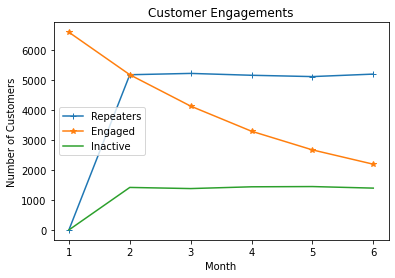

In [58]:
#https://www.codegrepper.com/code-examples/python/combine+two+line+graphs+matplotlib
#https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
#Call plt.plot() as many times as needed to add additional lines to plot.

# Example usage:
import matplotlib.pyplot as plt
x_coordinates = customer_metrics['Month']

y1_coordinates = customer_metrics['Repeaters']
y2_coordinates = customer_metrics['Engaged']
y3_coordinates = customer_metrics['Inactive']

plt.plot(x_coordinates, y1_coordinates, marker = '+') # plot first line
plt.plot(x_coordinates, y2_coordinates, marker = '*') # plot second line
plt.plot(x_coordinates, y3_coordinates) # plot second line
plt.legend(['Repeaters', 'Engaged', 'Inactive'])
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.title("Customer Engagements")
plt.savefig('customer_eng_graph.png')

In [59]:
monthly_sales

,transaction_month,total_monthly_sales
0,1,62522565
1,2,63820403
2,3,63943846
3,4,63420965
4,5,63740675
5,6,63704318


In [60]:
#https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean
monthly_sales["total_monthly_sales"].mean()

63525462.0

In [61]:
#https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
cumu_sales = monthly_sales["total_monthly_sales"].sum().astype(int)
cumu_sales

381152772

In [62]:
#https://www.geeksforgeeks.org/calculate-the-average-variance-and-standard-deviation-in-python-using-numpy/
sales_data = {'Total Sales per Month Description': ['Total Cumulative Sales (from Jan-Jun 2022)', 'Mean Monthly Sales', 'Minimum', 'Maximum', 'Standard Deviation'],
        'Value': [int(monthly_sales["total_monthly_sales"].sum()), int(monthly_sales["total_monthly_sales"].mean()), int(monthly_sales["total_monthly_sales"].min()), int(monthly_sales["total_monthly_sales"].max()), int(monthly_sales["total_monthly_sales"].std())]}
  
# Create DataFrame
sales_observations = pd.DataFrame(sales_data)
sales_observations

,Total Sales per Month Description,Value
0,Total Cumulative Sales (from Jan-Jun 2022),381152772
1,Mean Monthly Sales,63525462
2,Minimum,62522565
3,Maximum,63943846
4,Standard Deviation,520972


In [63]:
monthly_count_copy = monthly_count_df.copy()
monthly_count_copy

transaction_month,1,2,3,4,5,6
item,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


In [64]:
monthly_count_copy["Total Quantity Sold"] = monthly_count_copy.sum(axis=1)
monthly_count_copy

transaction_month,1,2,3,4,5,6,Total Quantity Sold
item,,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902,59302
Gummy Vitamins,9681,9980,10145,9842,9948,9980,59576
Gummy Worms,9559,9996,9986,10043,9801,9934,59319
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104,59390
Nutrional Milk,9727,9691,9876,9786,9881,9767,58728
Orange Beans,9774,10037,9611,9914,9964,10106,59406
Yummy Vegetables,9959,10256,9896,9861,9735,9722,59429


In [65]:
dfi.export(monthly_count_copy, 'item_count_df.png')

In [66]:
new2_copy = new2_df.copy()

In [67]:
new2_copy["Total Sales per Item"] = new2_copy.sum(axis=1)

In [68]:
new2_copy

transaction_month,1,2,3,4,5,6,Total Sales per Item
item,,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698,77033298
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000,89364000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100,8897850
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096,47452610
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330,116868720
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094,11821794
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000,29714500


In [69]:
new2_copy.loc['Total Sales per Month'] = new2_copy.sum()

In [70]:
new2_copy

transaction_month,1,2,3,4,5,6,Total Sales per Item
item,,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698,77033298
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000,89364000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100,8897850
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096,47452610
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330,116868720
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094,11821794
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000,29714500
Total Sales per Month,62522565,63820403,63943846,63420965,63740675,63704318,381152772


In [71]:
dfi.export(new2_copy, 'total_sales_df.png')

In [72]:
dfi.export(ppi_df, 'price_per_item_df.png')

In [73]:
new3_copy = new2_df.copy()
new3_copy

transaction_month,1,2,3,4,5,6
item,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000


In [74]:
new3_copy["Total Sales per Item"] = new3_copy.sum(axis=1)
new3_copy

transaction_month,1,2,3,4,5,6,Total Sales per Item
item,,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698,77033298
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000,89364000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100,8897850
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096,47452610
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330,116868720
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094,11821794
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000,29714500


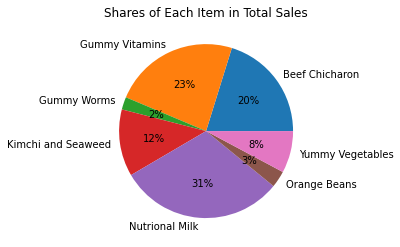

In [75]:
#https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
#https://www.codegrepper.com/code-examples/python/pandas+plot+disable+legend
import matplotlib.pyplot as plt
pie = new3_copy.groupby(['item']).sum().plot(
    kind='pie', y='Total Sales per Item', autopct='%1.0f%%', legend = False, ylabel = '', title = 'Shares of Each Item in Total Sales')
plt.savefig('total_sales_pie.png')

In [76]:
dfi.export(sales_observations, 'total_sales_description.png')

In [77]:
transaction_count

,transaction_month,name,name_count,repeaters,engaged,inactive
0,1,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6588,0,6588,0
1,2,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6631,5172,5172,1416
2,3,"[Jennifer Campbell, Melissa Kim, Kristen Coope...",6622,5216,4126,1378
3,4,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6556,5154,3289,1437
4,5,"[Melissa Kim, Kristen Cooper, Alexander Davis,...",6568,5110,2667,1445
5,6,"[Jennifer Campbell, Alexander Davis, Michael L...",6652,5193,2190,1393


In [78]:
cust_count_data = {'Unique Customer Count Description': ['Total Unique Customer Count (from Jan-Jun 2022)', 'Mean Monthly Unique Customer Count', 'Minimum', 'Maximum', 'Standard Deviation'],
        'Value': [int(len(name_unique)), int(transaction_count["name_count"].mean()), int(transaction_count["name_count"].min()), int(transaction_count["name_count"].max()), int(transaction_count["name_count"].std())]}
  
# Create DataFrame
customer_observations = pd.DataFrame(cust_count_data)
customer_observations

,Unique Customer Count Description,Value
0,Total Unique Customer Count (from Jan-Jun 2022),8487
1,Mean Monthly Unique Customer Count,6602
2,Minimum,6556
3,Maximum,6652
4,Standard Deviation,37


In [79]:
dfi.export(customer_observations, 'unique_customer_description.png')

In [80]:
customer_metrics3 = customer_metrics.copy()
customer_metrics3

,Month,Repeaters,Inactive,Engaged
0,1,0,0,6588
1,2,5172,1416,5172
2,3,5216,1378,4126
3,4,5154,1437,3289
4,5,5110,1445,2667
5,6,5193,1393,2190


In [81]:
customer_metrics3['Unique Customer Count'] = transaction_count['name_count']

In [82]:
customer_metrics3 = customer_metrics3[['Month','Unique Customer Count','Repeaters','Inactive','Engaged']]
customer_metrics3

,Month,Unique Customer Count,Repeaters,Inactive,Engaged
0,1,6588,0,0,6588
1,2,6631,5172,1416,5172
2,3,6622,5216,1378,4126
3,4,6556,5154,1437,3289
4,5,6568,5110,1445,2667
5,6,6652,5193,1393,2190


In [83]:
#https://pynative.com/pandas-set-index/
customer_metrics3 = customer_metrics3.set_index(['Month'])
customer_metrics3 = customer_metrics3.T
customer_metrics3

Month,1,2,3,4,5,6
Unique Customer Count,6588,6631,6622,6556,6568,6652
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1378,1437,1445,1393
Engaged,6588,5172,4126,3289,2667,2190


In [84]:
dfi.export(customer_metrics3, 'cust_eng_df.png')

In [85]:
monthly_count_df

transaction_month,1,2,3,4,5,6
item,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


<AxesSubplot:title={'center':'Count of Items per Month'}, xlabel='Item Type', ylabel='Number of Items Sold'>

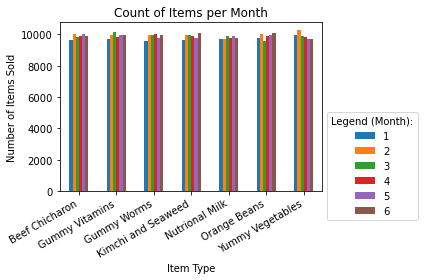

In [86]:
#https://discuss.dizzycoding.com/why-is-my-xlabel-cut-off-in-my-matplotlib-plot/
#https://stackoverflow.com/questions/26700598/matplotlib-showing-x-tick-labels-overlapping
item_count_chart = monthly_count_df.plot(kind = 'bar')
plt.xlabel('Item Type')
plt.ylabel('Number of Items Sold')
item_count_chart.set_xticklabels(monthly_count_df.index)
plt.setp(plt.gca().get_xticklabels(), rotation = 30, horizontalalignment = 'right')
plt.title('Count of Items per Month')
plt.legend(title='Legend (Month):', bbox_to_anchor =(1, 0.5))
plt.tight_layout()
plt.savefig('item_count_bar.png')

item_count_chart

In [87]:
monthly_count_copy

transaction_month,1,2,3,4,5,6,Total Quantity Sold
item,,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902,59302
Gummy Vitamins,9681,9980,10145,9842,9948,9980,59576
Gummy Worms,9559,9996,9986,10043,9801,9934,59319
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104,59390
Nutrional Milk,9727,9691,9876,9786,9881,9767,58728
Orange Beans,9774,10037,9611,9914,9964,10106,59406
Yummy Vegetables,9959,10256,9896,9861,9735,9722,59429


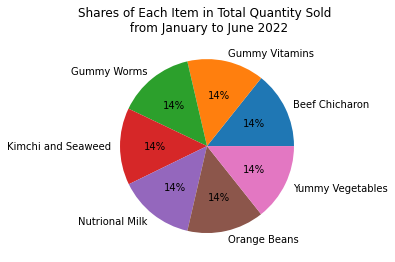

In [88]:
import matplotlib.pyplot as plt
pie2 = monthly_count_copy.groupby(['item']).sum().plot(
    kind='pie', y='Total Quantity Sold', autopct='%1.0f%%', legend = False, ylabel = '', title = 'Shares of Each Item in Total Quantity Sold \n from January to June 2022')
plt.savefig('item_count_pie.png')

In [89]:
monthly_sales

,transaction_month,total_monthly_sales
0,1,62522565
1,2,63820403
2,3,63943846
3,4,63420965
4,5,63740675
5,6,63704318


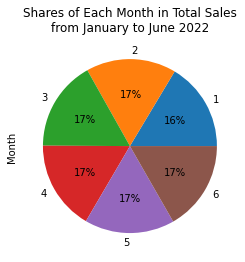

In [90]:
import matplotlib.pyplot as plt
pie3 = monthly_sales.groupby(['transaction_month']).sum().plot(
    kind='pie', y='total_monthly_sales', autopct='%1.0f%%', legend = False, ylabel = 'Month', title = 'Shares of Each Month in Total Sales\nfrom January to June 2022')
plt.savefig('monthly_sales_pie.png')

In [91]:
customer_metrics4 = customer_metrics.copy()

In [92]:
customer_metrics4['Unique Customer Count'] = transaction_count['name_count']

In [93]:
customer_metrics4 = customer_metrics4[['Month','Unique Customer Count','Repeaters','Inactive','Engaged']]
customer_metrics4

,Month,Unique Customer Count,Repeaters,Inactive,Engaged
0,1,6588,0,0,6588
1,2,6631,5172,1416,5172
2,3,6622,5216,1378,4126
3,4,6556,5154,1437,3289
4,5,6568,5110,1445,2667
5,6,6652,5193,1393,2190


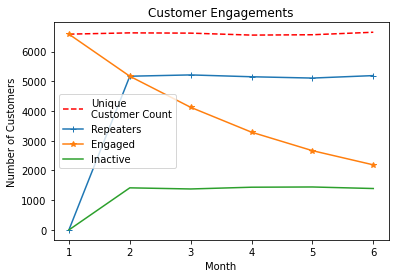

In [94]:
import matplotlib.pyplot as plt
x_coordinates = customer_metrics4['Month']

y1_coordinates = customer_metrics4['Unique Customer Count']
y2_coordinates = customer_metrics4['Repeaters']
y3_coordinates = customer_metrics4['Engaged']
y4_coordinates = customer_metrics4['Inactive']

plt.plot(x_coordinates, y1_coordinates, 'r--')
plt.plot(x_coordinates, y2_coordinates, marker = '+') # plot second line
plt.plot(x_coordinates, y3_coordinates, marker = '*') # plot third line
plt.plot(x_coordinates, y4_coordinates) # plot fourth line
plt.legend(['Unique\nCustomer Count', 'Repeaters', 'Engaged', 'Inactive'])
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.title("Customer Engagements")
plt.savefig('customer_eng_graph.png')

In [95]:
monthly_count_copy

transaction_month,1,2,3,4,5,6,Total Quantity Sold
item,,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902,59302
Gummy Vitamins,9681,9980,10145,9842,9948,9980,59576
Gummy Worms,9559,9996,9986,10043,9801,9934,59319
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104,59390
Nutrional Milk,9727,9691,9876,9786,9881,9767,58728
Orange Beans,9774,10037,9611,9914,9964,10106,59406
Yummy Vegetables,9959,10256,9896,9861,9735,9722,59429


In [96]:
tqs_max = monthly_count_copy['Total Quantity Sold'].max()
tqs_max

59576

In [97]:
tqs_min = monthly_count_copy['Total Quantity Sold'].min()
tqs_min

58728

In [98]:
tqs_range = tqs_max - tqs_min
tqs_range

848